In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os




In [3]:
home_path=open('/home/ec2-user/SageMaker/mariano/repositories/train-test-split/smart-phase-scal-dp-train-test/config/repository_path.txt').read()

two_round_scal_home_path=open('/home/ec2-user/SageMaker/mariano/repositories/train-test-split/two-phase-scal-dp-train-test/config/repository_path.txt').read()

input_file = os.path.join(home_path,'results/two_phase_scal_sim_results.csv')
df =pd.read_csv(input_file)
print(df.shape)
df.head()
two_round_df=pd.read_csv(os.path.join(two_round_scal_home_path, 'results/two_phase_scal_sim_results.csv'))

df=pd.concat([df, two_round_df])

(350, 31)


<AxesSubplot:xlabel='Total effort', ylabel='F1-Score (test)'>

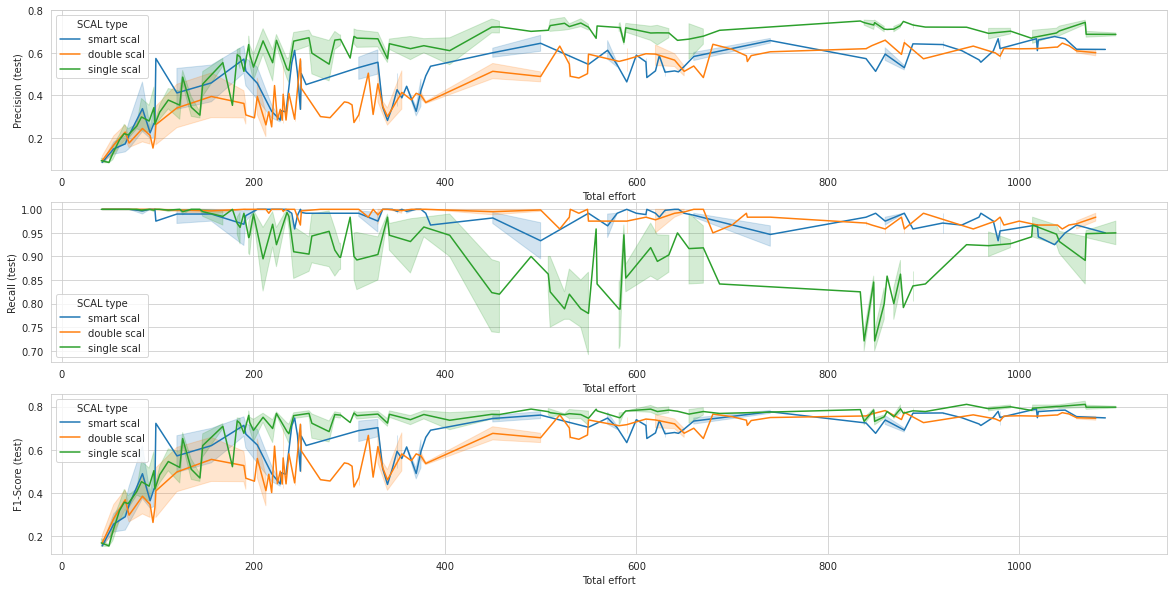

In [4]:
sns.set_style('whitegrid')
# fig, ax = plt.subplots(3,figsize=(20,10))


# x_axis_var='Total effort'
# df = pd.read_csv(input_file)

# # PLOT DOUBLE SCAL
# print(f'df.shape={df.shape}')
# double_scal_df = df[df['SCAL type']=='double scal']
# double_scal_df = double_scal_df[double_scal_df['SCAL-round-no']==2]
# print(f'double_scal_df.shape={double_scal_df.shape}')
# print(double_scal_df.shape)
# double_scal_df = double_scal_df.sort_values(by=x_axis_var)

# x = sorted(list(set(double_scal_df[x_axis_var])))

# f1score=[]
# recall=[]
# precision=[]
# for xi in x:
#     auxdf=double_scal_df[double_scal_df[x_axis_var]==xi]
#     f1score.append(np.average(auxdf['F1-Score (corrected)']))
#     precision.append(np.average(auxdf['Precision (corrected)']))
#     recall.append(np.average(auxdf['Recall (corrected)']))
# ax[0].plot(x,precision, marker='x', label='double round scal')
# ax[1].plot(x,recall, marker='x', label='double round scal')
# ax[2].plot(x,f1score, marker='x', label='double round scal')

    
# # PLOT SINGLE SCAL
# single_scal_df = df[df['SCAL type']=='single scal']
# print(f'single_scal_df.shape={single_scal_df.shape}')
# print(single_scal_df.shape)

# single_scal_df = single_scal_df.sort_values(by=x_axis_var)
# x = sorted(list(set(single_scal_df[x_axis_var])))
# f1score=[]
# recall=[]
# precision=[]
# for xi in x:
#     auxdf=single_scal_df[single_scal_df[x_axis_var]==xi]
#     f1score.append(np.average(auxdf['F1-Score']))
#     precision.append(np.average(auxdf['Precision']))
#     recall.append(np.average(auxdf['Recall']))
# ax[0].plot(x,precision, marker='x', label='single round scal')
# ax[1].plot(x,recall, marker='x', label='single round scal')
# ax[2].plot(x,f1score, marker='x', label='single round scal')



# # MISC
# ax[2].legend()

# ax[0].set_ylabel('Precision')
# ax[1].set_ylabel('Recall')
# ax[2].set_ylabel('F1-Score')
# for ax_i in ax:
#     ax_i.set_xlabel(x_axis_var)
    
# if x_axis_var=='Total effort':
#     for ax_i in ax:        
#         y1, y2 = ax_i.get_ylim()
#         ax_i.plot([1308, 1308], [y1,y2], ls='--')
#         ax_i.set_ylim(y1,y2)

# pd.DataFrame({'type':['single round scal', 'double round scal'], 
#               'Avg. Precision': [np.average(single_scal_df['Precision']), np.average(double_scal_df['Precision (corrected)'])],
#               'Avg. Recall': [np.average(single_scal_df['Recall']), np.average(double_scal_df['Recall (corrected)'])],
#               'Avg. F1-Score': [np.average(single_scal_df['F1-Score']), np.average(double_scal_df['F1-Score (corrected)'])],
#              })
fig,ax=plt.subplots(3,figsize=(20,10))


    
    
df1 = pd.read_csv(input_file)
df2 = pd.read_csv(os.path.join(two_round_scal_home_path, 'results/two_phase_scal_sim_results.csv'))
new_df = pd.DataFrame(np.vstack([df1.values, df2.values]), columns=df1.columns)
new_df=new_df[((new_df['SCAL type']=='smart scal') & (new_df['SCAL-round-no']==2)) | \
              ((new_df['SCAL type']=='single scal')) | \
              ((new_df['SCAL type']=='double scal') & (new_df['SCAL-round-no']==2)) ]
# df=pd.read_csv(input_file)

# x_name='N'
x_name='Total effort'
sns.lineplot(x=x_name, y="Precision (test)",
             hue="SCAL type",
             data=new_df,ax=ax[0])
sns.lineplot(x=x_name, y="Recall (test)",
             hue="SCAL type",
             data=new_df,ax=ax[1])
sns.lineplot(x=x_name, y="F1-Score (test)",
             hue="SCAL type",
             data=new_df,ax=ax[2])



type=single scal shape=(350, 31)
type=double scal shape=(175, 31)
type=smart scal shape=(175, 31)
type=single scal shape=(350, 31)
type=double scal shape=(175, 31)
type=smart scal shape=(175, 31)
type=single scal shape=(350, 31)
type=double scal shape=(175, 31)
type=smart scal shape=(175, 31)


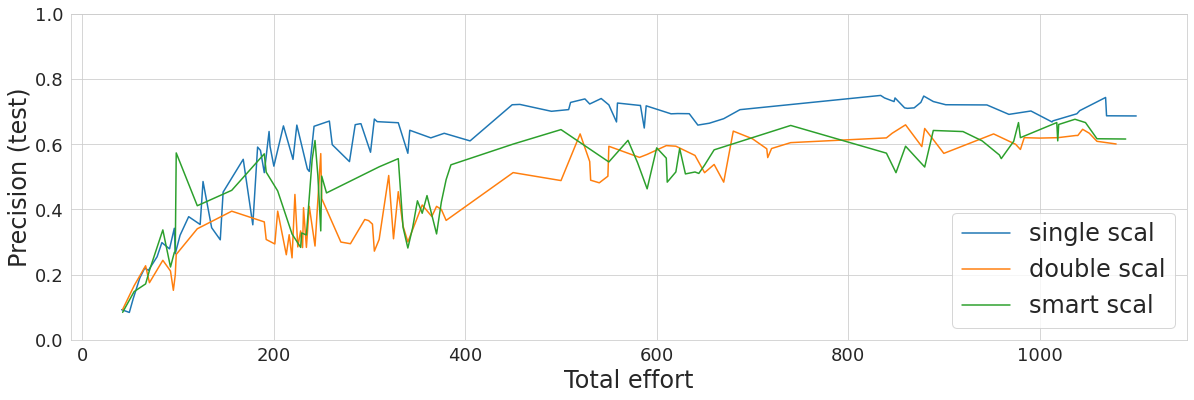

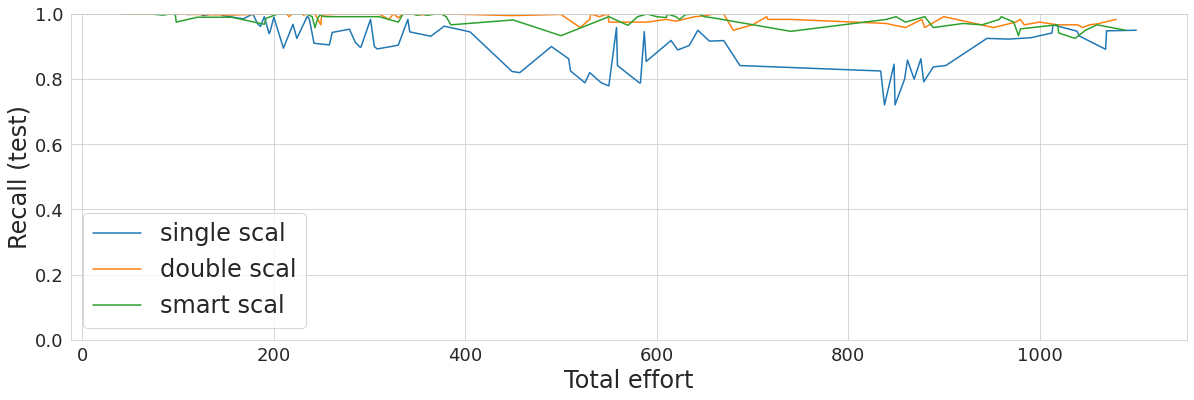

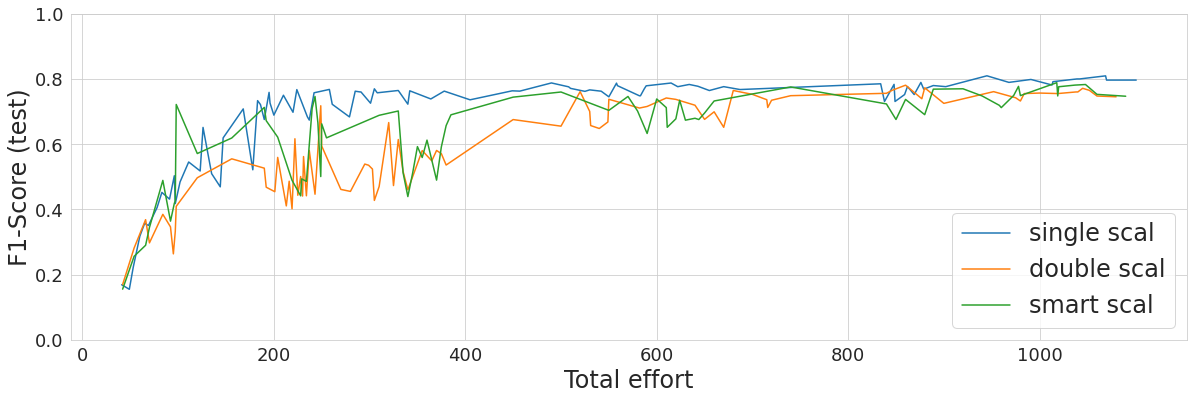

In [5]:
x_axis = 'Total effort'

for metric in ['Precision (test)', 'Recall (test)', 'F1-Score (test)']:
    fig, ax = plt.subplots(1, figsize=(20,6))
    df1 = pd.read_csv(input_file)
    df2 = pd.read_csv(os.path.join(two_round_scal_home_path, 'results/two_phase_scal_sim_results.csv'))
    new_df = pd.DataFrame(np.vstack([df1.values, df2.values]), columns=df1.columns)




    for type_ in set(new_df['SCAL type']):
        auxdf = new_df[new_df['SCAL type']==type_]
        if len(set(auxdf['SCAL-round-no']))==2:
            auxdf = auxdf[auxdf['SCAL-round-no']==2]
        print(f'type={type_} shape={auxdf.shape}')
        xs = []
        ys = []
        for x, subdf in auxdf.groupby(x_axis):
    #         print(f"averaging ={len(subdf['Recall (test)'])} x={x:5}, type={type_}")
            xs.append(x)
            ys.append(np.average(subdf[metric]))

        data = zip(xs,ys)
        data = sorted(data, key=lambda x: x[0])
        ax.plot([x for x,_ in data], [y for _, y in data], label=type_)

    ax.set_ylim(0,1.001)
    ax.set_xlabel(x_axis, fontsize=24)
    ax.set_ylabel(metric, fontsize=24)
    ax.legend(fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig(f'smart_single_double_{metric}.jpg')

In [4]:
from sklearn.metrics import auc
metrics=['Precision', 'Recall', 'F1-Score']
types=['smart', 'double', 'single']

data = {'Type':[]}
for metric in metrics:
    data[metric]=[]
    

for type_ix,type_ in enumerate(types):
    data['Type'].append(type_)
    for metric_ix, metric in enumerate(metrics):
        axis=ax[metric_ix]
        x = axis.lines[type_ix].get_xdata()
        y = axis.lines[type_ix].get_ydata()
        data[metric].append(auc(x,y)/auc(x,[1]*len(x)))
        
(pd.DataFrame(data))
# x1 = f1_axis.lines[0].get_xdata()
# f1_smart = f1_axis.lines[0].get_ydata()
# print(f'Smart: {auc(x1,f1_smart)/auc(x1,[1]*len(x1))}')

# x2 = f1_axis.lines[1].get_xdata()
# f1_double = f1_axis.lines[1].get_ydata()
# print(f'double: {auc(x2,f1_double)/auc(x2,[1]*len(x2))}')


# x3 = f1_axis.lines[2].get_xdata()
# f1_single = f1_axis.lines[2].get_ydata()
# print(f'single: {auc(x3,f1_single)/auc(x3,[1]*len(x3))}')

,Type,Precision,Recall,F1-Score
0,smart,0.540478,0.976534,0.684405
1,double,0.493967,0.985742,0.643413
2,single,0.639690,0.901453,0.730538


<AxesSubplot:xlabel='Total effort', ylabel='F1-Score'>

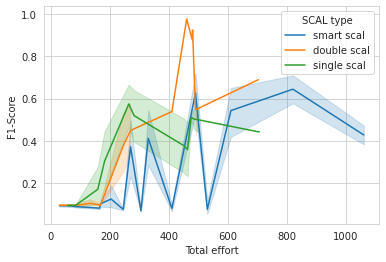

In [61]:
df_concat=df1.append(df2)
sns.lineplot(data=new_df, hue='SCAL type', x='Total effort', y='F1-Score')

In [39]:

df

,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,...,threshold,Accuracy (test),Precision (test),Recall (test),F1-Score (test),TP (test),FP (test),TN (test),FN (test),Total effort
1,2023-04-14 10:34,16633,logreg,relevance,20newsgroup,753,1,29,0.040525,0.040525,...,0.171282,0.044344,0.044344,1.000000,0.084922,167,3599,0,0,58
3,2023-04-14 10:35,20538,logreg,relevance,20newsgroup,753,1,29,0.050057,0.050057,...,0.138838,0.050717,0.050717,1.000000,0.096538,191,3575,0,0,58
5,2023-04-14 10:35,13080,logreg,relevance,20newsgroup,753,1,29,0.050723,0.050723,...,0.177400,0.051514,0.051514,1.000000,0.097980,194,3572,0,0,58
7,2023-04-14 10:35,9251,logreg,relevance,20newsgroup,753,1,29,0.050657,0.050657,...,0.222669,0.051514,0.051514,1.000000,0.097980,194,3572,0,0,58
9,2023-04-14 10:36,7088,logreg,relevance,20newsgroup,753,1,29,0.049323,0.049323,...,0.222129,0.052045,0.052045,1.000000,0.098940,196,3570,0,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2023-04-13 10:06,8117,logreg,relevance,20newsgroup,753,26,487,0.925463,0.269576,...,0.072462,0.919809,0.246575,0.769231,0.373444,90,275,3374,27,487
320,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,20,410,0.968466,0.686224,...,0.085244,0.968401,0.714286,0.479042,0.573477,80,32,3567,87,410
321,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,20,293,0.535354,0.531250,...,0.208108,0.945831,0.445428,0.904192,0.596838,151,188,3411,16,703
322,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,55,706,0.966669,0.731707,...,0.136989,0.966543,0.797101,0.329341,0.466102,55,14,3585,112,706


In [38]:
df.columns

Index(['Date', 'Seed', 'Model', 'Ranking Function', 'Dataset', 'N', 'n',
       'Effort', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
       'Relevant labeled', 'TP', 'TN', 'FP', 'FN', 'Prevalence', 'category',
       'target-recall', 'SCAL-round-no', 'SCAL type', 'threshold',
       'Accuracy (test)', 'Precision (test)', 'Recall (test)',
       'F1-Score (test)', 'TP (test)', 'FP (test)', 'TN (test)', 'FN (test)',
       'Total effort'],
      dtype='object')

In [22]:

df.columns

Index(['Date', 'Seed', 'Model', 'Ranking Function', 'Dataset', 'N', 'n',
       'Effort', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
       'Relevant labeled', 'TP', 'TN', 'FP', 'FN', 'Prevalence', 'category',
       'target-recall', 'SCAL-round-no', 'SCAL type', 'threshold',
       'Accuracy (test)', 'Precision (test)', 'Recall (test)',
       'F1-Score (test)', 'TP (test)', 'FP (test)', 'TN (test)', 'FN (test)',
       'Total effort'],
      dtype='object')

,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,...,threshold,Accuracy (test),Precision (test),Recall (test),F1-Score (test),TP (test),FP (test),TN (test),FN (test),Total effort
1,2023-04-14 10:34,16633,logreg,relevance,20newsgroup,753,1,29,0.040525,0.044344,...,0.171282,0.044344,0.044344,1.000000,0.084922,167,3599,0,0,58
3,2023-04-14 10:35,20538,logreg,relevance,20newsgroup,753,1,29,0.050057,0.050717,...,0.138838,0.050717,0.050717,1.000000,0.096538,191,3575,0,0,58
5,2023-04-14 10:35,13080,logreg,relevance,20newsgroup,753,1,29,0.050723,0.051514,...,0.177400,0.051514,0.051514,1.000000,0.097980,194,3572,0,0,58
7,2023-04-14 10:35,9251,logreg,relevance,20newsgroup,753,1,29,0.050657,0.051514,...,0.222669,0.051514,0.051514,1.000000,0.097980,194,3572,0,0,58
9,2023-04-14 10:36,7088,logreg,relevance,20newsgroup,753,1,29,0.049323,0.052045,...,0.222129,0.052045,0.052045,1.000000,0.098940,196,3570,0,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2023-04-13 10:06,8117,logreg,relevance,20newsgroup,753,26,487,0.925463,0.269576,...,0.072462,0.919809,0.246575,0.769231,0.373444,90,275,3374,27,487
320,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,20,410,0.968466,0.686224,...,0.085244,0.968401,0.714286,0.479042,0.573477,80,32,3567,87,410
321,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,20,293,0.535354,0.531250,...,0.208108,0.945831,0.445428,0.904192,0.596838,151,188,3411,16,703
322,2023-04-13 10:06,23087,logreg,relevance,20newsgroup,753,55,706,0.966669,0.731707,...,0.136989,0.966543,0.797101,0.329341,0.466102,55,14,3585,112,706


In [19]:
df.columns

Index(['Date', 'Seed', 'Model', 'Ranking Function', 'Dataset', 'N', 'n',
       'Effort', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
       'Relevant labeled', 'TP', 'TN', 'FP', 'FN', 'Prevalence', 'category',
       'target-recall', 'SCAL-round-no', 'SCAL type', 'threshold',
       'Accuracy (test)', 'Precision (test)', 'Recall (test)',
       'F1-Score (test)', 'TP (test)', 'FP (test)', 'TN (test)', 'FN (test)',
       'Total effort'],
      dtype='object')

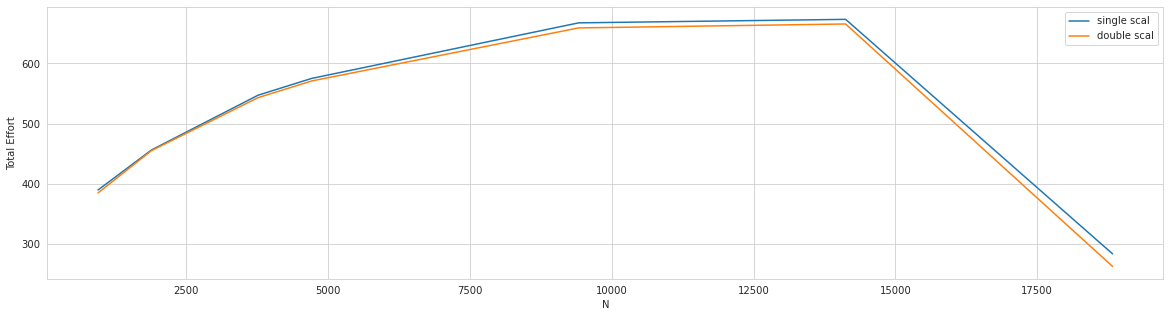

In [100]:
fig,ax=plt.subplots(1,figsize=(20,5))
df = pd.read_csv(input_file)

df=df[((df['SCAL type']=='double scal') & (df['SCAL-round-no']==2)) | ((df['SCAL type']=='single scal')) ]

Ns = sorted(list(set(df['N'])))
x=Ns
single_scal_effort=[]
double_scal_effort=[]
for Ni in Ns:
    auxdf=df[df['N']==Ni]
    single_scal_effort.append(np.average(auxdf[auxdf['SCAL type']=='single scal']['Total effort']))
    double_scal_effort.append(np.average(auxdf[auxdf['SCAL type']=='double scal']['Total effort']))
    
ax.plot(x,single_scal_effort, label='single scal')
ax.plot(x,double_scal_effort, label='double scal')
ax.set_ylabel('Total Effort')
ax.set_xlabel('N')
ax.legend()

In [45]:
from scipy.stats import t
def confidence_interval(data):
    m = np.average(data)
    s = np.std(data)
    dof = len(x)-1 
    confidence = 0.95
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 
    
confidence_interval(single_scal_df['F1-Score'])

(0.11023385352535914, 0.8223558534830593)